In [1]:
# Module
import glob
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# ESP32 Time log
esp32_time_logs = {}
for n in [8, 14, 20, 26]:
    time_log_file = glob.glob(f'./results/*resnet{n}/results*.json')
    print(time_log_file)
    with open(time_log_file[0], "r") as f:
        time_log = json.load(f)
    esp32_time_logs[str(n)] = pd.DataFrame({"Time": [time_log[i]["inference_time"] for i in time_log]})
esp32_time_logs["8"], esp32_time_logs["14"]

['./results/res-20240529-092228-resnet8/results-20240529-092228.json']
['./results/res-20240531-200256-resnet14/results-20240531-200256.json']
['./results/res-20240603-191551-resnet20/results-20240603-191551.json']
['./results/res-20240607-175831-resnet26/results-20240607-175831.json']


(          Time
 0     7.777869
 1     7.777839
 2     7.777931
 3     7.777902
 4     7.777941
 ...        ...
 9995  7.777919
 9996  7.777880
 9997  7.777885
 9998  7.777918
 9999  7.777861
 
 [10000 rows x 1 columns],
           Time
 0     16.36938
 1     16.36944
 2     16.36939
 3     16.36940
 4     16.36934
 ...        ...
 9995  16.36944
 9996  16.36935
 9997  16.36939
 9998  16.36937
 9999  16.36934
 
 [10000 rows x 1 columns])

In [17]:
# RPi Tflite Time log
rpi_tflite_time_logs = {}
for n in [8, 14, 20, 26]:
    time_log_file = glob.glob(f'./results/*resnet{n}*tflite-pi/results*.json')
    print(time_log_file)
    with open(time_log_file[0], "r") as f:
        time_log = json.load(f)
    rpi_tflite_time_logs[str(n)] = pd.DataFrame({"Time": [time_log[i]["inference_time"] for i in time_log]})
rpi_tflite_time_logs["8"], rpi_tflite_time_logs["14"]

['./results/res-20240611-065149-resnet8-tflite-pi/results-20240611-065149.json']
['./results/res-20240611-070204-resnet14-tflite-pi/results-20240611-070204.json']
['./results/res-20240611-071142-resnet20-tflite-pi/results-20240611-071142.json']
['./results/res-20240611-072202-resnet26-tflite-pi/results-20240611-072202.json']


(          Time
 0     0.041694
 1     0.008897
 2     0.008787
 3     0.009236
 4     0.008755
 ...        ...
 9995  0.009218
 9996  0.008771
 9997  0.008770
 9998  0.008867
 9999  0.008814
 
 [10000 rows x 1 columns],
           Time
 0     0.060692
 1     0.017700
 2     0.017346
 3     0.017352
 4     0.017388
 ...        ...
 9995  0.017434
 9996  0.017292
 9997  0.017372
 9998  0.017729
 9999  0.017313
 
 [10000 rows x 1 columns])

In [18]:
# RPi Tf Time log
rpi_tf_time_logs = {}
for n in [8, 14, 20, 26]:
    time_log_file = glob.glob(f'./results/*resnet{n}*tf-pi/results*.json')
    print(time_log_file)
    with open(time_log_file[0], "r") as f:
        time_log = json.load(f)
    rpi_tf_time_logs[str(n)] = pd.DataFrame({"Time": [time_log[i]["inference_time"] for i in time_log]})
rpi_tf_time_logs["8"], rpi_tf_time_logs["14"]

['./results/res-20240612-192912-resnet8-tf-pi/results-20240612-192912.json']
['./results/res-20240612-203957-resnet14-tf-pi/results-20240612-203957.json']
['./results/res-20240612-222009-resnet20-tf-pi/results-20240612-222009.json']
['./results/res-20240613-211345-resnet26-tf-pi/results-20240613-211345.json']


(          Time
 0     0.744318
 1     0.218050
 2     0.232046
 3     0.239547
 4     0.232382
 ...        ...
 9995  0.229460
 9996  0.191063
 9997  0.229034
 9998  0.229551
 9999  0.230030
 
 [10000 rows x 1 columns],
           Time
 0     0.870454
 1     0.379581
 2     0.399956
 3     0.400430
 4     0.383729
 ...        ...
 9995  0.395644
 9996  0.328653
 9997  0.394461
 9998  0.399502
 9999  0.388351
 
 [10000 rows x 1 columns])

In [19]:
esp32_time_logs["8"].describe(), rpi_tflite_time_logs["8"].describe(), rpi_tf_time_logs["8"].describe()

(               Time
 count  10000.000000
 mean       7.777892
 std        0.000037
 min        7.777714
 25%        7.777869
 50%        7.777894
 75%        7.777916
 max        7.778031,
                Time
 count  10000.000000
 mean       0.008536
 std        0.001287
 min        0.003808
 25%        0.008750
 50%        0.008793
 75%        0.008838
 max        0.041694,
                Time
 count  10000.000000
 mean       0.222211
 std        0.017630
 min        0.133904
 25%        0.226744
 50%        0.228200
 75%        0.229034
 max        0.744318)

In [21]:
# Exemplo de media e max
for n in [8, 14, 20, 26]:
    print(f"{n}:", esp32_time_logs[str(n)]["Time"].mean(), esp32_time_logs[str(n)]["Time"].max())

8: 7.777891537841796 7.77803076171875
14: 16.369391475390625 16.3695498046875
20: 24.960737991796876 24.96094921875
26: 33.55272817109375 33.55298828125


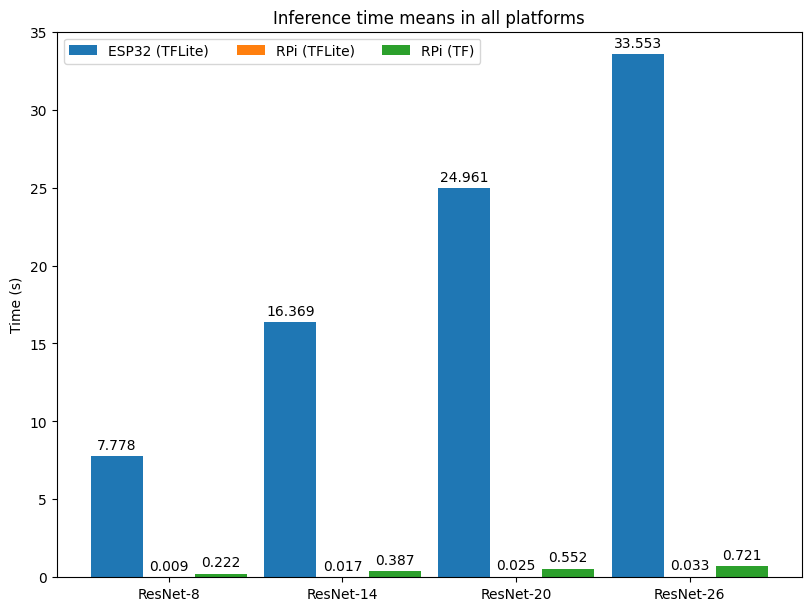

In [25]:
resnets = ("ResNet-8", "ResNet-14", "ResNet-20", "ResNet-26")

power_means = {}
power_means['ESP32 (TFLite)'] = [round(esp32_time_logs[str(n)]["Time"].mean(), 3) for n in [8, 14, 20, 26]]
power_means['RPi (TFLite)'] = [round(rpi_tflite_time_logs[str(n)]["Time"].mean(), 3) for n in [8, 14, 20, 26]]
power_means['RPi (TF)'] = [round(rpi_tf_time_logs[str(n)]["Time"].mean(), 3) for n in [8, 14, 20, 26]]

x = np.arange(len(resnets))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(8, 6))

for attribute, measurement in power_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (s)')
ax.set_title('Inference time means in all platforms')
ax.set_xticks(x + width, resnets)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 35)

plt.show()